# Perceptron

In [26]:
import numpy as np

In [31]:
# dlframework.nn.perceptron.py
class Perceptron:
    
    def __init__(self, N, alpha = 0.1):
        self.alpha = alpha
        # initialize the weight matrix
        self.W = np.random.randn(N + 1)/ np.sqrt(N)

    def step(self, x):
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs = 10):
        # insert a column of 1’s as the last entry in the feature 
        # matrix -- this little trick allows us to treat the bias
        #  # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for x,target in zip(X, y):
                # take the dot product between the input features
                #  and the weight matrix, then pass this value
                #  through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))

                # only perform a weight update if our prediction 
                # does not match the target
                if p != target:
                    # determine the error
                    error = p - target
                    delta = - self.alpha* error *x

                    # update the weight matrix
                    self.W += delta

    def predict(self, X, addBias = True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)

        if addBias:
            X = np.c_[X, np.ones(X.shape[0])]

        return self.step(np.dot(X, self.W))

## Application on various bitwise operators
### OR
*perceptron_or.py*

In [34]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

In [35]:
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

[INFO] training perceptron...


In [38]:
print("[INFO] evaluating...")
for (x, target) in zip(X, y):
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] evaluating...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


### AND
*perceptron_and.py*

In [39]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [40]:
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

[INFO] training perceptron...


In [41]:
print("[INFO] evaluating...")
for (x, target) in zip(X, y):
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] evaluating...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


### XOR
*perceptron_xor.py*

In [42]:
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [43]:
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

[INFO] training perceptron...


In [44]:
print("[INFO] evaluating...")
for (x, target) in zip(X, y):
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))

[INFO] evaluating...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=0
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


# Neural Network implementation

In [1]:
import numpy as np

In [2]:
# dlframework.nn.neuralnetwork.py
class NeuralNetwork:
    def __init__(self, layers, alpha = 0.1):
        self.W = []
        self.layers = layers
        self.alpha = alpha
        
        
        for i in range(0, len(layers)-2):
            
            w = np.random.randn(layers[i]+1, layers[i+1]+1)
            self.W.append(w / np.sqrt(layers[i])) # normalizing the variance of each neuron's output
            
        w = np.random.randn(layers[-2]+1, layers[-1])
        self.W.append(w/np.sqrt(layers[-2]))
        
        def __repr__(self):
            return "NeuralNetwork: {}".format(
                "-".join([str(i) for i in self.layers]))
        
        
    def sigmoid(self, x):
        return 1.0 / (1+np.exp(-x))
    
    def sigmoid_derv(self, y):
        # compute the derivative of the sigmoid function ASSUMING
        # that ‘y‘ has already been passed through the ‘sigmoid‘ function
        return y * (1 - y)
    
    def fit(self, X, y, epochs = 1000, displayUpdate=100):
        # insert a column of 1’s as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones(X.shape[0])]
        
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                
            if epoch == 0 or (epoch + 1)%displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print ("[INFO] epoch {}: loss = {:.7f}".format(
                                            epoch+1, loss))
                
                
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it’s just the input
        # feature vector itself
        
        A = [np.atleast_2d(x)]
        
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            
            A.append(out)
            
            # BACKPROPAGATION
            # the first phase of backpropagation is to compute the
            # difference between our *prediction* (the final output
            # activation in the activations list) and the true target value
            
        error = A[-1] - y
        # from here, we need to apply the chain rule and build our
        # list of deltas ‘D‘; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [error * self.sigmoid_derv(A[-1])]
        for layer in np.arange(len(A) - 2, 0 , -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_derv(A[layer])
            D.append(delta)

        # since we looped over our layers in reverse order we need to reverse the deltas
        D = D[::-1]

        # WEIGHT UPDATE PHASE
        for layer in np.arange(0, len(self.W)):
            # update our weights by taking the dot product of the layer
            # activations with their respective deltas, then multiplying
            # this value by some small learning rate and adding to our
            # weight matrix -- this is where the actual "learning" takes place
            self.W[layer] += -self.alpha*A[layer].T.dot(D[layer])
                
                
    def predict(self, X, addBias = True):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        
        if addBias:
            p = np.c_[p, np.ones(p.shape[0])]
            
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is as simple as taking
            # the dot product between the current activation value ‘p‘
            # and the weight matrix associated with the current layer,
            # then passing this value through a nonlinear activation function
            p = self.sigmoid(np.dot(p,self.W[layer]))
            
        return p
    
    
    def calculate_loss(self, X, targets):
        targets = np.atleast_2d(targets)
        preds  = self.predict(X, addBias=False)
        loss = 0.5 * np.sum((preds - targets)**2)
        
        return loss
                
        
    
    

## Application on XOR

In [24]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [25]:
nn = NeuralNetwork([2,2,1], alpha = 0.5)
nn.fit(X, y, epochs = 2000)

[INFO] epoch 1: loss = 0.5334347
[INFO] epoch 100: loss = 0.4995036
[INFO] epoch 200: loss = 0.4963543
[INFO] epoch 300: loss = 0.4899225
[INFO] epoch 400: loss = 0.4711093
[INFO] epoch 500: loss = 0.4227161
[INFO] epoch 600: loss = 0.3412286
[INFO] epoch 700: loss = 0.2223304
[INFO] epoch 800: loss = 0.1117730
[INFO] epoch 900: loss = 0.0580254
[INFO] epoch 1000: loss = 0.0349988
[INFO] epoch 1100: loss = 0.0237725
[INFO] epoch 1200: loss = 0.0175059
[INFO] epoch 1300: loss = 0.0136293
[INFO] epoch 1400: loss = 0.0110426
[INFO] epoch 1500: loss = 0.0092157
[INFO] epoch 1600: loss = 0.0078677
[INFO] epoch 1700: loss = 0.0068383
[INFO] epoch 1800: loss = 0.0060300
[INFO] epoch 1900: loss = 0.0053806
[INFO] epoch 2000: loss = 0.0048490


In [29]:
for x, target in zip(X, y):
    pred= nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
                    x, target[0], pred, step))

[INFO] data=[0 0], ground-truth=0, pred=0.0479, step=0
[INFO] data=[0 1], ground-truth=1, pred=0.9531, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.9531, step=1
[INFO] data=[1 1], ground-truth=0, pred=0.0548, step=0


In [31]:
### If we change it to 2-1 architecture, won't learn the non-linearity
nn = NeuralNetwork([2,1], alpha = 0.5)
nn.fit(X, y, epochs = 2000)
for x, target in zip(X, y):
    pred= nn.predict(x)[0][0]
    step = 1 if pred > 0.5 else 0
    print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
                    x, target[0], pred, step))

[INFO] epoch 1: loss = 0.5530475
[INFO] epoch 100: loss = 0.5023417
[INFO] epoch 200: loss = 0.5009645
[INFO] epoch 300: loss = 0.5008183
[INFO] epoch 400: loss = 0.5007975
[INFO] epoch 500: loss = 0.5007944
[INFO] epoch 600: loss = 0.5007939
[INFO] epoch 700: loss = 0.5007938
[INFO] epoch 800: loss = 0.5007938
[INFO] epoch 900: loss = 0.5007938
[INFO] epoch 1000: loss = 0.5007938
[INFO] epoch 1100: loss = 0.5007938
[INFO] epoch 1200: loss = 0.5007938
[INFO] epoch 1300: loss = 0.5007938
[INFO] epoch 1400: loss = 0.5007938
[INFO] epoch 1500: loss = 0.5007938
[INFO] epoch 1600: loss = 0.5007938
[INFO] epoch 1700: loss = 0.5007938
[INFO] epoch 1800: loss = 0.5007938
[INFO] epoch 1900: loss = 0.5007938
[INFO] epoch 2000: loss = 0.5007938
[INFO] data=[0 0], ground-truth=0, pred=0.5161, step=1
[INFO] data=[0 1], ground-truth=1, pred=0.5000, step=1
[INFO] data=[1 0], ground-truth=1, pred=0.4839, step=0
[INFO] data=[1 1], ground-truth=0, pred=0.4678, step=0


## Application on MNIST

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer #OH encoding
from sklearn.metrics import classification_report

In [16]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)

print("[INFO] loading MNIST (sample) dataset...")
digits = load_digits()
data = digits.data.astype("float")
data = (data - data.min())/(data.max() - data.min())
print("[INFO] samples={}, dim= {}".format(data.shape[0], data.shape[1]))

[INFO] loading MNIST (sample) dataset...
[INFO] samples=1797, dim= 64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.25)

In [19]:
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [22]:
print("[INFO] training network")
nn = NeuralNetwork([X_train.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(X_train, y_train, epochs=1000)

[INFO] training network
[INFO] <__main__.NeuralNetwork object at 0x7f401096aa20>
[INFO] epoch 1: loss = 606.0808841
[INFO] epoch 100: loss = 7.6238250
[INFO] epoch 200: loss = 3.6009606
[INFO] epoch 300: loss = 2.9854417
[INFO] epoch 400: loss = 2.5182484
[INFO] epoch 500: loss = 2.3294293
[INFO] epoch 600: loss = 2.2467080
[INFO] epoch 700: loss = 2.1975295
[INFO] epoch 800: loss = 2.1644659
[INFO] epoch 900: loss = 2.1405562
[INFO] epoch 1000: loss = 2.1222105


In [25]:
print("[INFO] evaluating our model")
preds = nn.predict(X_test)
preds = preds.argmax( axis = 1)
print(classification_report(y_test.argmax(axis=1), preds))

[INFO] evaluating our model
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      0.98      0.98        44
           2       0.98      0.98      0.98        41
           3       0.94      0.98      0.96        51
           4       0.90      1.00      0.95        43
           5       1.00      0.96      0.98        51
           6       1.00      0.97      0.99        38
           7       1.00      0.96      0.98        45
           8       1.00      0.95      0.98        42
           9       0.98      1.00      0.99        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



# Multi-layer Network with Keras

## MNIST
*keras_mnist.py*

In [46]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets 

In [50]:
print("[INFO] Loading MNIST data...")
mnist = datasets.fetch_openml("mnist_784")
data = mnist.data.astype("float")
# scale the raw pixel intensities to the range [0, 1.0]
data = data/ 255.0

[INFO] Loading MNIST data...


In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, mnist.target, test_size = 0.25)

In [52]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [54]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [55]:
# train the model using SGD
sgd = SGD(0.01)
model.compile(optimizer = sgd, loss = "categorical_crossentropy", metrics = ['accuracy'])
H= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 2s 42us/step - loss: 2.2856 - accuracy: 0.1933 - val_loss: 2.2452 - val_accuracy: 0.1737
Epoch 2/100
52500/52500 [==============================] - 2s 33us/step - loss: 2.2171 - accuracy: 0.3731 - val_loss: 2.1848 - val_accuracy: 0.4226
Epoch 3/100
52500/52500 [==============================] - 2s 32us/step - loss: 2.1471 - accuracy: 0.4988 - val_loss: 2.1052 - val_accuracy: 0.6154
Epoch 4/100
52500/52500 [==============================] - 2s 35us/step - loss: 2.0507 - accuracy: 0.5934 - val_loss: 1.9895 - val_accuracy: 0.6227
Epoch 5/100
52500/52500 [==============================] - 2s 39us/step - loss: 1.9156 - accuracy: 0.6362 - val_loss: 1.8323 - val_accuracy: 0.6342
Epoch 6/100
52500/52500 [==============================] - 2s 40us/step - loss: 1.7394 - accuracy: 0.6743 - val_loss: 1.6407 - val_accuracy: 0.6854
Epoch 7/100
52500/52500 [==============================] - 2s 

Epoch 56/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3303 - accuracy: 0.9063 - val_loss: 0.3456 - val_accuracy: 0.9002
Epoch 57/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3284 - accuracy: 0.9071 - val_loss: 0.3440 - val_accuracy: 0.9008
Epoch 58/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3265 - accuracy: 0.9075 - val_loss: 0.3417 - val_accuracy: 0.9010
Epoch 59/100
52500/52500 [==============================] - 2s 38us/step - loss: 0.3245 - accuracy: 0.9077 - val_loss: 0.3405 - val_accuracy: 0.9005
Epoch 60/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3227 - accuracy: 0.9082 - val_loss: 0.3383 - val_accuracy: 0.9010
Epoch 61/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3209 - accuracy: 0.9093 - val_loss: 0.3373 - val_accuracy: 0.9013
Epoch 62/100
52500/52500 [==============================] - 2s 39us/step - loss: 0.3192 - accuracy: 0.9096

In [56]:
print("[INFO] evaluating network...")
preds = model.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
                           target_names= [str(x)for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1734
           1       0.95      0.97      0.96      2025
           2       0.90      0.89      0.89      1723
           3       0.91      0.88      0.89      1784
           4       0.90      0.92      0.91      1662
           5       0.88      0.86      0.87      1615
           6       0.93      0.94      0.94      1715
           7       0.92      0.92      0.92      1812
           8       0.89      0.88      0.88      1703
           9       0.89      0.89      0.89      1727

    accuracy                           0.91     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.91      0.91      0.91     17500



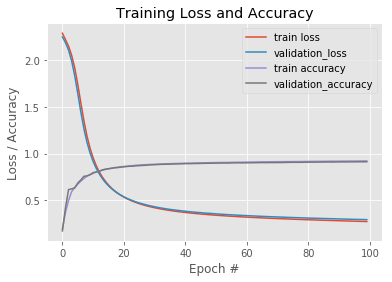

In [59]:
plt.style.use("ggplot")
plt.figure
plt.plot(np.arange(0,100), H.history["loss"], label="train loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="validation_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label="train accuracy")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="validation_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
plt.legend()
plt.show()

## CIFAR-10
*keras_cifar10.py*

In [60]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

In [61]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] Loading CIFAR-10 data")
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()
X_train = X_train.astype("float") / 255.0
X_test = X_test.astype("float") / 255.0

[INFO] Loading CIFAR-10 data
170500096/170498071 [==============================] - 57s 0us/step


In [63]:
X_train = X_train.reshape((X_train.shape[0], 3072))
X_test = X_test.reshape((X_test.shape[0], 3072))

In [64]:
X_train.shape

(50000, 3072)

In [65]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [68]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [69]:
#train the model using SGD
sgd = SGD(0.01)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs = 100, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 17s 343us/step - loss: 1.8614 - accuracy: 0.3359 - val_loss: 1.7873 - val_accuracy: 0.3467
Epoch 2/100
50000/50000 [==============================] - 17s 341us/step - loss: 1.6743 - accuracy: 0.4064 - val_loss: 1.6977 - val_accuracy: 0.3808
Epoch 3/100
50000/50000 [==============================] - 17s 342us/step - loss: 1.5885 - accuracy: 0.4365 - val_loss: 1.6108 - val_accuracy: 0.4293
Epoch 4/100
50000/50000 [==============================] - 17s 345us/step - loss: 1.5322 - accuracy: 0.4578 - val_loss: 1.6960 - val_accuracy: 0.3851
Epoch 5/100
50000/50000 [==============================] - 17s 345us/step - loss: 1.4860 - accuracy: 0.4757 - val_loss: 1.5114 - val_accuracy: 0.4498
Epoch 6/100
50000/50000 [==============================] - 17s 345us/step - loss: 1.4444 - accuracy: 0.4909 - val_loss: 1.4729 - val_accuracy: 0.4777
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.4976 - accuracy: 0.8336 - val_loss: 1.6342 - val_accuracy: 0.5288
Epoch 56/100
50000/50000 [==============================] - 17s 345us/step - loss: 0.4859 - accuracy: 0.8349 - val_loss: 1.6924 - val_accuracy: 0.5240
Epoch 57/100
50000/50000 [==============================] - 18s 353us/step - loss: 0.4670 - accuracy: 0.8428 - val_loss: 1.5845 - val_accuracy: 0.5540
Epoch 58/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.4508 - accuracy: 0.8480 - val_loss: 1.7876 - val_accuracy: 0.5110
Epoch 59/100
50000/50000 [==============================] - 17s 340us/step - loss: 0.4362 - accuracy: 0.8546 - val_loss: 1.6429 - val_accuracy: 0.5434
Epoch 60/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.4209 - accuracy: 0.8600 - val_loss: 1.6373 - val_accuracy: 0.5359
Epoch 61/100
50000/50000 [==============================] - 18s 355us/step - loss: 0.4100 - ac

In [70]:
print("[INFO] evaluating the network...")
y_pred = model.predict(X_test, batch_size = 32)
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1),
                           target_names = labelNames))

[INFO] evaluating the network...
              precision    recall  f1-score   support

    airplane       0.66      0.62      0.64      1000
  automobile       0.68      0.66      0.67      1000
        bird       0.47      0.45      0.46      1000
         cat       0.36      0.47      0.41      1000
        deer       0.51      0.46      0.48      1000
         dog       0.47      0.41      0.44      1000
        frog       0.63      0.58      0.60      1000
       horse       0.65      0.61      0.63      1000
        ship       0.64      0.73      0.68      1000
       truck       0.57      0.60      0.59      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



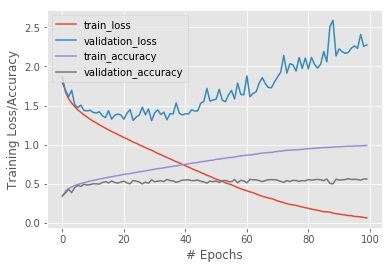

In [71]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0,100), H.history["val_loss"], label="validation_loss")
plt.plot(np.arange(0,100), H.history["accuracy"], label = "train_accuracy")
plt.plot(np.arange(0,100), H.history["val_accuracy"], label="validation_accuracy")
plt.xlabel("# Epochs")
plt.ylabel("Training Loss/Accuracy")
plt.legend()
plt.show()